In [1]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [2]:
# Path to UTKFace dataset
DATASET_PATH = r"D:\6. WIN SEM -- 2024-2025\F1. DL\Child Surveillance DL Project\Datasets\1. Face Recognition\UTKFace\UTKFace"

In [3]:
# Image Constraints.
IMG_SIZE = 200
MAX_AGE = 80
IMAGES_PER_AGE = 12


In [4]:
def get_age(filename):
    return int(filename.split('_')[0])


In [5]:
# Step 1: Load and group image filenames by age
age_groups = {}
for file in os.listdir(DATASET_PATH):
    if file.endswith(".jpg"):
        try:
            age = get_age(file)
            if 0 <= age <= MAX_AGE:
                age_groups.setdefault(age, []).append(file)
        except:
            continue


In [6]:
# Step 2: Sample 12 random images per age
selected_files = []
for age in range(0, MAX_AGE + 1):
    files = age_groups.get(age, [])
    if len(files) >= IMAGES_PER_AGE:
        selected_files.extend(random.sample(files, IMAGES_PER_AGE))
    else:
        selected_files.extend(files)


In [7]:
# Step 3: Load and preprocess images
X, y = [], []
for file in selected_files:
    age = get_age(file)
    img_path = os.path.join(DATASET_PATH, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img / 255.0)
        label = 1 if age <= 15 else 0
        y.append(label)

X = np.array(X)
y = np.array(y)


In [8]:
# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 5: Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)      

In [10]:
# Step 6: Train
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=16)


Epoch 1/20


48/48 [==============================] - 41s 825ms/step - loss: 0.5393 - accuracy: 0.7943 - val_loss: 0.4557 - val_accuracy: 0.8385
Epoch 2/20
48/48 [==============================] - 44s 923ms/step - loss: 0.5020 - accuracy: 0.8060 - val_loss: 0.4218 - val_accuracy: 0.8385
Epoch 3/20
48/48 [==============================] - 49s 1s/step - loss: 0.4760 - accuracy: 0.8060 - val_loss: 0.4051 - val_accuracy: 0.8385
Epoch 4/20
48/48 [==============================] - 41s 867ms/step - loss: 0.4243 - accuracy: 0.8242 - val_loss: 0.3527 - val_accuracy: 0.8385
Epoch 5/20
48/48 [==============================] - 44s 910ms/step - loss: 0.3612 - accuracy: 0.8372 - val_loss: 0.2937 - val_accuracy: 0.8854
Epoch 6/20
48/48 [==============================] - 40s 839ms/step - loss: 0.3197 - accuracy: 0.8555 - val_loss: 0.3065 - val_accuracy: 0.8854
Epoch 7/20
48/48 [==============================] - 42s 880ms/step - loss: 0.3076 - accuracy: 0.8477 - val_loss: 0.2691 - val_accuracy: 0.9167


In [22]:
# Step 7: Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss:     {loss:.4f}")
print(f"Test accuracy: {accuracy*100:.2f}%")


6/6 [==============================] - 2s 308ms/step - loss: 0.2888 - accuracy: 0.9323
Test loss:     0.2888
Test accuracy: 93.23%


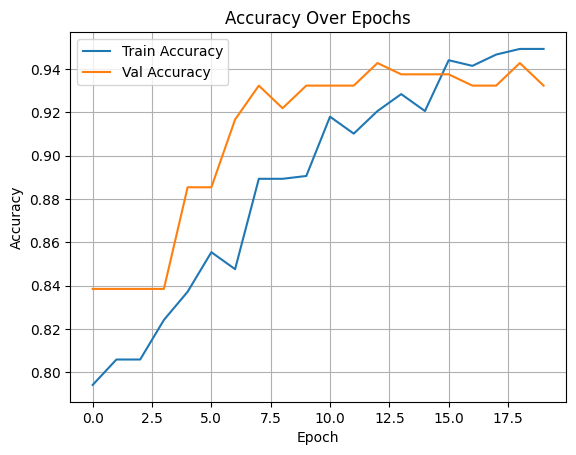

In [23]:
# Step 8: Plot for accuarcy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


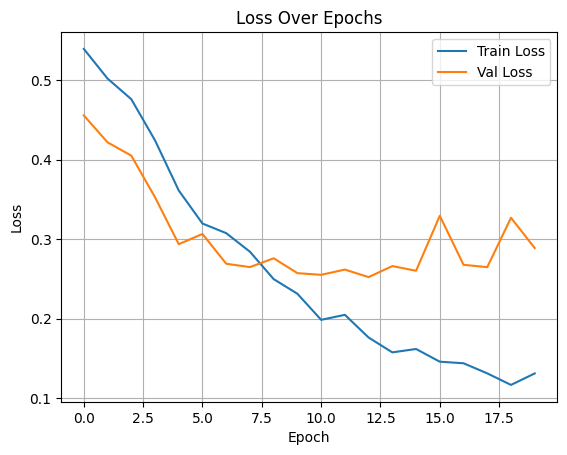

In [27]:
# 9. plot for loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [28]:
model.save("child_detection.keras")